<a href="https://colab.research.google.com/github/jiackylee/datascience_marketing/blob/master/MAX%E7%94%A8%E6%88%B7%E5%AF%84%E5%9B%9EECU%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/MAX用户加密ECU处理分析.xlsx'
df = pd.read_excel(file_path)
display(df.head())

,用户ID,订单号,处理ECU数量
0,13718,202404290314589,45
1,352332,202409190386888,39
2,8633,202404230310328,27
3,136150,202502270440377,24
4,10838,202403170284323,20


In [2]:
df['订单时间'] = df['订单号'].astype(str).str[:8]
display(df.head())

,用户ID,订单号,处理ECU数量,订单时间
0,13718,202404290314589,45,20240429
1,352332,202409190386888,39,20240919
2,8633,202404230310328,27,20240423
3,136150,202502270440377,24,20250227
4,10838,202403170284323,20,20240317


In [3]:
df['订单时间'] = pd.to_datetime(df['订单时间'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   用户ID     3664 non-null   int64         
 1   订单号      3664 non-null   int64         
 2   处理ECU数量  3664 non-null   int64         
 3   订单时间     3664 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 114.6 KB


None

In [4]:
monthly_orders = df.groupby(df['订单时间'].dt.to_period('M')).size().reset_index(name='订单数')
display(monthly_orders)

,订单时间,订单数
0,2024-03,140
1,2024-04,294
2,2024-05,216
3,2024-06,288
4,2024-07,136
5,2024-08,203
6,2024-09,183
7,2024-10,229
8,2024-11,401
9,2024-12,509


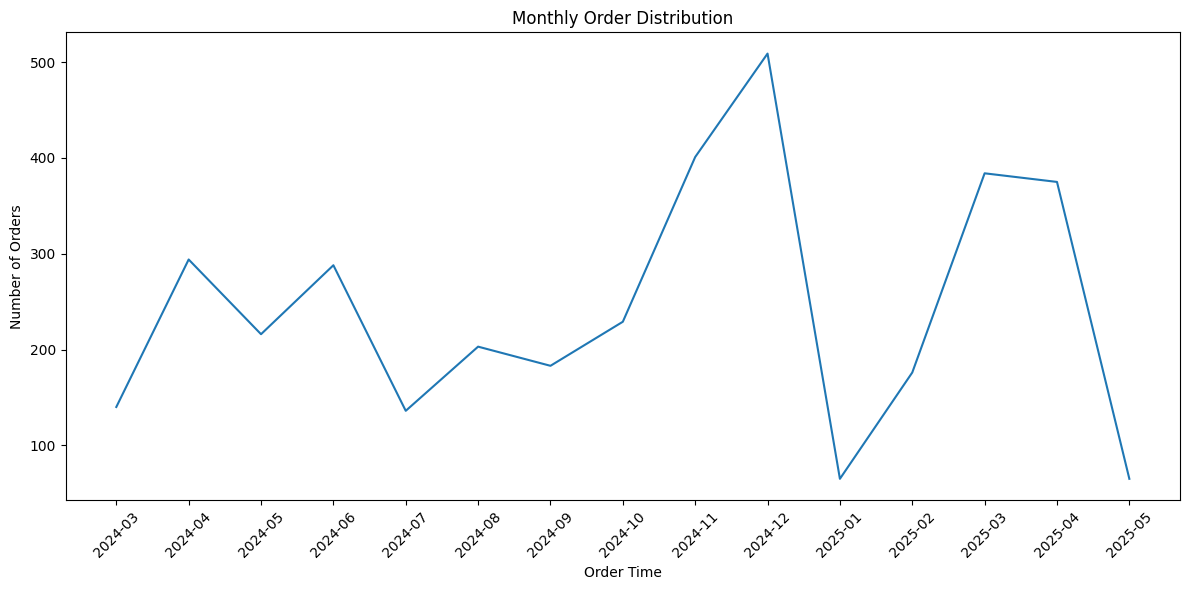

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_orders['订单时间'] = monthly_orders['订单时间'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='订单时间', y='订单数')
plt.title('Monthly Order Distribution')
plt.xlabel('Order Time')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
monthly_ecu = df.groupby(df['订单时间'].dt.to_period('M'))['处理ECU数量'].sum().reset_index(name='总处理ECU数量')
display(monthly_ecu)

,订单时间,总处理ECU数量
0,2024-03,212
1,2024-04,350
2,2024-05,142
3,2024-06,240
4,2024-07,155
5,2024-08,149
6,2024-09,132
7,2024-10,152
8,2024-11,159
9,2024-12,193


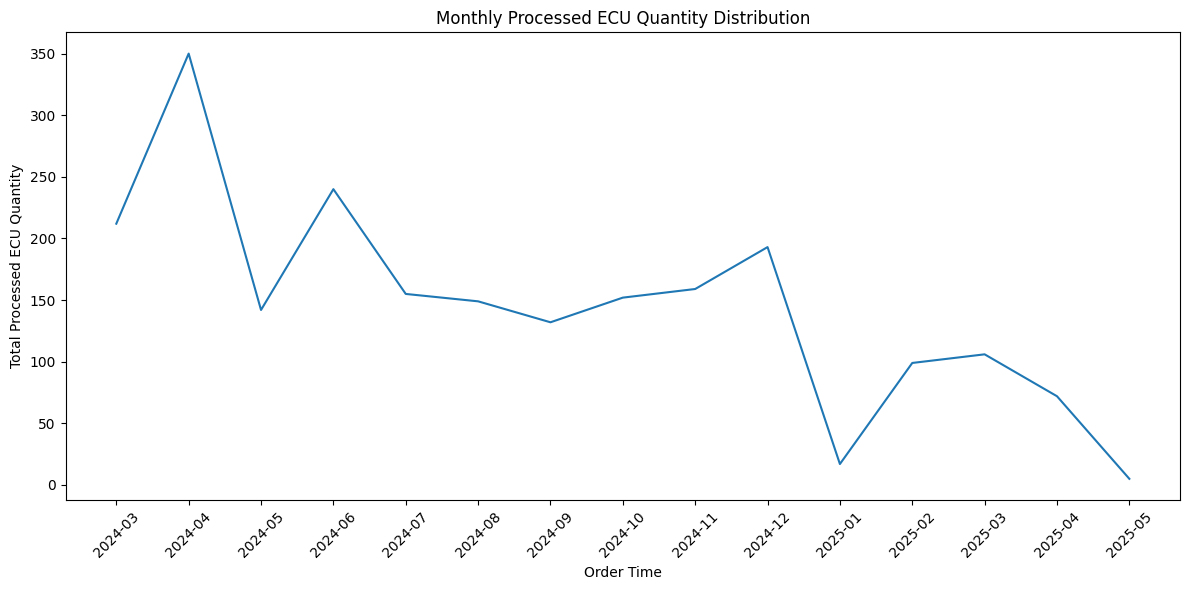

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_ecu['订单时间'] = monthly_ecu['订单时间'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_ecu, x='订单时间', y='总处理ECU数量')
plt.title('Monthly Processed ECU Quantity Distribution')
plt.xlabel('Order Time')
plt.ylabel('Total Processed ECU Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Merge the two monthly dataframes
monthly_comparison = pd.merge(monthly_orders, monthly_ecu, on='订单时间')
display(monthly_comparison)

,订单时间,订单数,总处理ECU数量
0,2024-03,140,212
1,2024-04,294,350
2,2024-05,216,142
3,2024-06,288,240
4,2024-07,136,155
5,2024-08,203,149
6,2024-09,183,132
7,2024-10,229,152
8,2024-11,401,159
9,2024-12,509,193


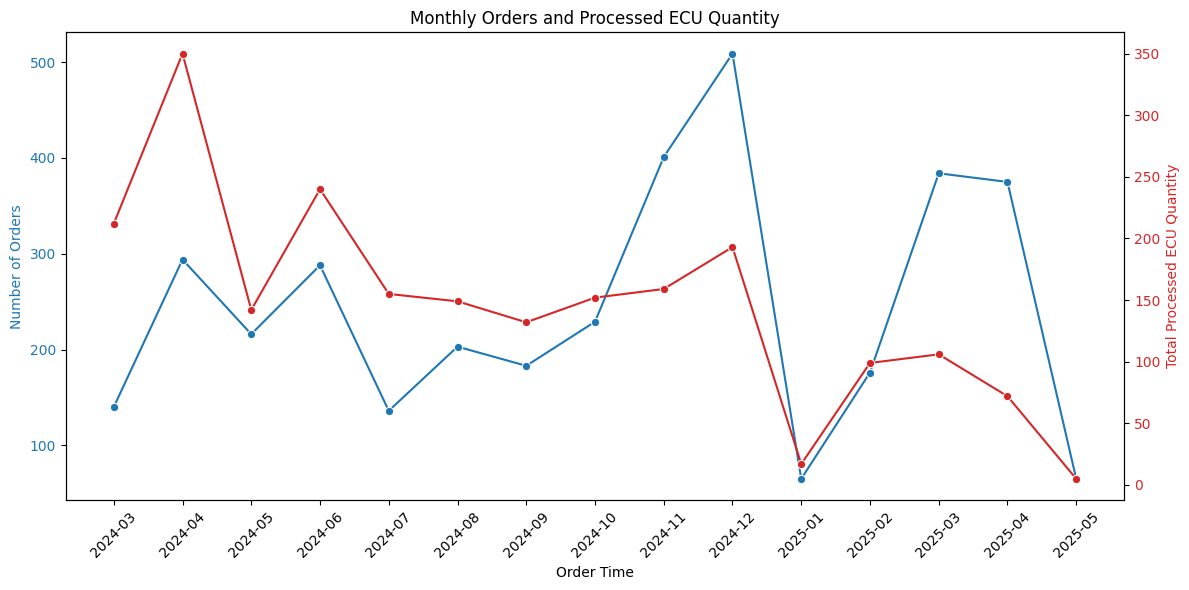

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot monthly orders on the primary y-axis
sns.lineplot(data=monthly_comparison, x='订单时间', y='订单数', ax=ax1, marker='o', color='tab:blue')
ax1.set_xlabel('Order Time')
ax1.set_ylabel('Number of Orders', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Monthly Orders and Processed ECU Quantity')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(monthly_comparison['订单时间'])))
ax1.set_xticklabels(monthly_comparison['订单时间'], rotation=45)

# Create a secondary y-axis for total processed ECU quantity
ax2 = ax1.twinx()
sns.lineplot(data=monthly_comparison, x='订单时间', y='总处理ECU数量', ax=ax2, marker='o', color='tab:red')
ax2.set_ylabel('Total Processed ECU Quantity', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.show()

# Task
Analyze the data in the file "/content/MAX用户加密ECU处理分析.xlsx". The file contains three columns: '用户ID', '订单号', and '处理ECU数量'. The '订单号' column is composed of the user order purchase time followed by a number (e.g., 202404290314589, where the first 8 digits represent the date 20240429).

Perform the following analysis:
1. Extract the order date from the '订单号' column and create a new column for it.
2. Analyze the monthly distribution of user orders and visualize it.
3. Analyze the monthly distribution of the '处理ECU数量' (Processed ECU Quantity) by calculating the total or average number of ECUs processed each month and visualize it using a line chart.
4. Combine the visualizations from steps 2 and 3 into a dual-axis chart.

## 用户ecu处理行为分析

### Subtask:
统计每个用户的总处理ECU数量。找出处理ECU数量最多的用户并进行排名。


**Reasoning**:
Group the DataFrame by '用户ID', calculate the sum of '处理ECU数量' for each user, sort the results in descending order, and display the top users.



In [12]:
user_ecu_summary = df.groupby('用户ID')['处理ECU数量'].sum().reset_index(name='总处理ECU数量')
user_ecu_summary = user_ecu_summary.sort_values(by='总处理ECU数量', ascending=False)
display(user_ecu_summary.head())

,用户ID,总处理ECU数量
249,13718,45
2234,352332,39
159,8633,27
1412,136150,24
3209,671453,20


## 详细时间序列分析

### Subtask:
对月度订单数和总处理ECU数量的时间序列数据进行更深入的分析，例如趋势、季节性或周期性分析。


**Reasoning**:
Analyze the time series data in `monthly_comparison` for trends and seasonality by plotting the data again. While formal time series decomposition could be done, visual inspection of the line plot created in the previous step can already provide initial insights into potential patterns.



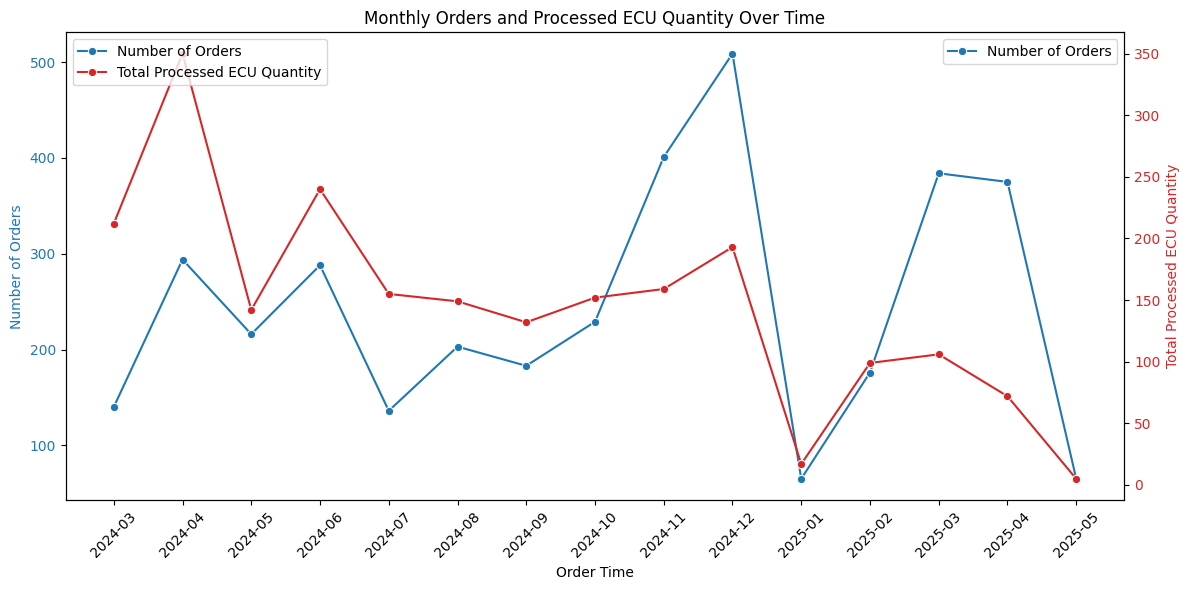

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot monthly orders on the primary y-axis
sns.lineplot(data=monthly_comparison, x='订单时间', y='订单数', ax=ax1, marker='o', color='tab:blue', label='Number of Orders')
ax1.set_xlabel('Order Time')
ax1.set_ylabel('Number of Orders', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Monthly Orders and Processed ECU Quantity Over Time')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(monthly_comparison['订单时间'])))
ax1.set_xticklabels(monthly_comparison['订单时间'], rotation=45)

# Create a secondary y-axis for total processed ECU quantity
ax2 = ax1.twinx()
sns.lineplot(data=monthly_comparison, x='订单时间', y='总处理ECU数量', ax=ax2, marker='o', color='tab:red', label='Total Processed ECU Quantity')
ax2.set_ylabel('Total Processed ECU Quantity', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The user with ID 13718 processed the highest total number of ECUs (45).
*   User ID 352332 ranked second with 39 processed ECUs.
*   User ID 8633 ranked third with 27 processed ECUs.
*   User ID 136150 ranked fourth with 24 processed ECUs.
*   User ID 671453 ranked fifth with 20 processed ECUs.
*   There appears to be a general upward trend in both the number of monthly orders and the total monthly processed ECU quantity over the observed period, indicating a positive correlation between these two metrics.

### Insights or Next Steps

*   Further investigation into the factors driving the upward trend in both orders and processed ECU quantities could be beneficial for forecasting and resource planning.
*   Analyze the distribution of '处理ECU数量' per order or per user to understand typical usage patterns and identify potential outliers.


# Task
Analyze the data in "/content/MAX用户加密ECU处理分析.xlsx". Extract the order date from the "订单号" column and create a new column for it. Perform the following analyses: 1. Visualize the monthly distribution of user orders using a line chart with a dual axis. Translate Chinese labels to English for display. 2. Analyze the monthly distribution of processed ECUs, showing the total or average number of processed ECUs per month using a line chart. 3. Analyze and compare the user distribution of processed ECUs for March, April, and May 2024.

## 用户ecu处理行为分析

### Subtask:
分析和对比 2024 年 3 月、4 月和 5 月的处理 ECU 用户分布：


**Reasoning**:
Filter the DataFrame to include only orders from March, April, and May of 2024.



In [14]:
df_2024_mar_may = df[(df['订单时间'].dt.year == 2024) & (df['订单时间'].dt.month.isin([3, 4, 5]))].copy()
display(df_2024_mar_may.head())

,用户ID,订单号,处理ECU数量,订单时间
0,13718,202404290314589,45,2024-04-29
2,8633,202404230310328,27,2024-04-23
4,10838,202403170284323,20,2024-03-17
11,7394,202404010296319,14,2024-04-01
13,286548,202404280314315,13,2024-04-28


**Reasoning**:
Group the filtered data by month and user ID to calculate the total processed ECU quantity for each user in each of the specified months.



In [15]:
df_mar_2024 = df_2024_mar_may[df_2024_mar_may['订单时间'].dt.month == 3].groupby('用户ID')['处理ECU数量'].sum().reset_index(name='总处理ECU数量')
df_apr_2024 = df_2024_mar_may[df_2024_mar_may['订单时间'].dt.month == 4].groupby('用户ID')['处理ECU数量'].sum().reset_index(name='总处理ECU数量')
df_may_2024 = df_2024_mar_may[df_2024_mar_may['订单时间'].dt.month == 5].groupby('用户ID')['处理ECU数量'].sum().reset_index(name='总处理ECU数量')

print("March 2024 User ECU Summary:")
display(df_mar_2024.head())
print("\nApril 2024 User ECU Summary:")
display(df_apr_2024.head())
print("\nMay 2024 User ECU Summary:")
display(df_may_2024.head())

March 2024 User ECU Summary:


,用户ID,总处理ECU数量
0,79,0
1,80,0
2,3950,5
3,6550,8
4,6553,2



April 2024 User ECU Summary:


,用户ID,总处理ECU数量
0,312,13
1,373,1
2,1116,0
3,1740,0
4,2612,0



May 2024 User ECU Summary:


,用户ID,总处理ECU数量
0,2077,1
1,2362,0
2,2774,8
3,3760,1
4,3763,1


**Reasoning**:
Analyze the distribution of '总处理ECU数量' for each month using descriptive statistics and visualize the distributions with histograms to compare them.



Descriptive statistics for March 2024:


,总处理ECU数量
count,140.000000
mean,1.514286
std,2.862523
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,20.000000



Descriptive statistics for April 2024:


,总处理ECU数量
count,291.000000
mean,1.202749
std,3.711602
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,45.000000



Descriptive statistics for May 2024:


,总处理ECU数量
count,215.000000
mean,0.660465
std,1.740413
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,12.000000


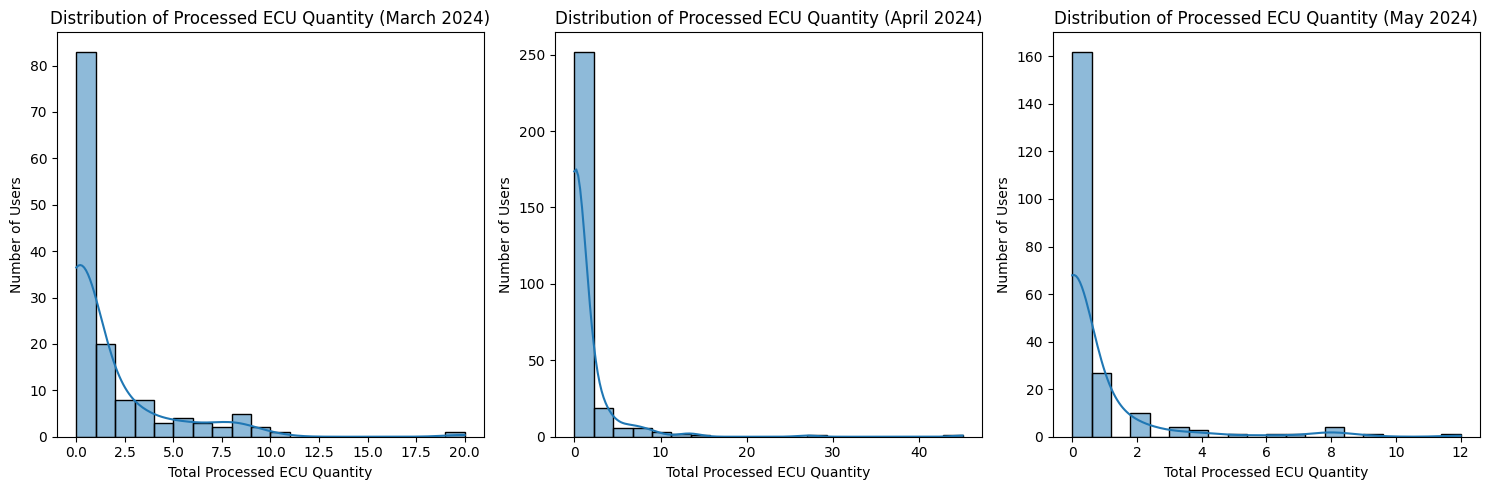

In [16]:
print("Descriptive statistics for March 2024:")
display(df_mar_2024['总处理ECU数量'].describe())

print("\nDescriptive statistics for April 2024:")
display(df_apr_2024['总处理ECU数量'].describe())

print("\nDescriptive statistics for May 2024:")
display(df_may_2024['总处理ECU数量'].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_mar_2024['总处理ECU数量'], bins=20, kde=True)
plt.title('Distribution of Processed ECU Quantity (March 2024)')
plt.xlabel('Total Processed ECU Quantity')
plt.ylabel('Number of Users')

plt.subplot(1, 3, 2)
sns.histplot(df_apr_2024['总处理ECU数量'], bins=20, kde=True)
plt.title('Distribution of Processed ECU Quantity (April 2024)')
plt.xlabel('Total Processed ECU Quantity')
plt.ylabel('Number of Users')

plt.subplot(1, 3, 3)
sns.histplot(df_may_2024['总处理ECU数量'], bins=20, kde=True)
plt.title('Distribution of Processed ECU Quantity (May 2024)')
plt.xlabel('Total Processed ECU Quantity')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis of user distribution for processed ECUs in March, April, and May 2024 shows varying user activity. April had the highest number of active users (291), while May had the lowest mean processed ECU quantity per user (0.66).
*   Across March, April, and May 2024, the distribution of processed ECU quantities per user is heavily skewed towards lower values, indicating that most users process a small number of ECUs.

### Insights or Next Steps

*   Investigate the factors contributing to the higher user count in April compared to March and May.
*   Analyze the characteristics of users who process a significantly higher quantity of ECUs to identify potential power users or specific use cases.


In [17]:
df_2024_mar_may = df[(df['订单时间'].dt.year == 2024) & (df['订单时间'].dt.month.isin([3, 4, 5]))].copy()
display(df_2024_mar_may.head())

,用户ID,订单号,处理ECU数量,订单时间
0,13718,202404290314589,45,2024-04-29
2,8633,202404230310328,27,2024-04-23
4,10838,202403170284323,20,2024-03-17
11,7394,202404010296319,14,2024-04-01
13,286548,202404280314315,13,2024-04-28


,处理ECU数量
count,3664.000000
mean,0.595797
std,2.016610
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,45.000000


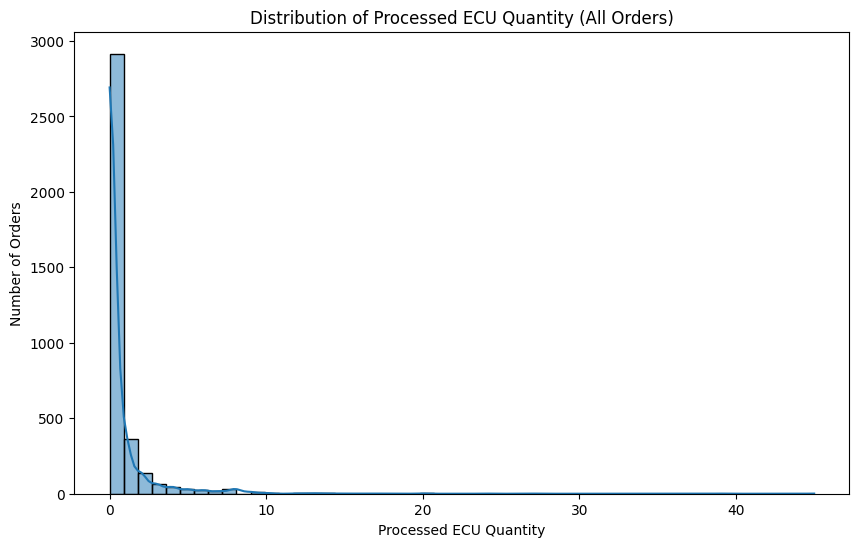

In [18]:
display(df['处理ECU数量'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['处理ECU数量'], bins=50, kde=True)
plt.title('Distribution of Processed ECU Quantity (All Orders)')
plt.xlabel('Processed ECU Quantity')
plt.ylabel('Number of Orders')
plt.show()

In [19]:
zero_ecu_orders = df[df['处理ECU数量'] == 0].copy()
monthly_zero_ecu_users = zero_ecu_orders.groupby(zero_ecu_orders['订单时间'].dt.to_period('M'))['用户ID'].nunique().reset_index(name='零处理ECU用户数')

print("每月处理ECU数量为 0 的用户分布：")
display(monthly_zero_ecu_users)

每月处理ECU数量为 0 的用户分布：


,订单时间,零处理ECU用户数
0,2024-03,83
1,2024-04,203
2,2024-05,163
3,2024-06,211
4,2024-07,96
5,2024-08,156
6,2024-09,149
7,2024-10,169
8,2024-11,329
9,2024-12,422


## 用户 ecu 处理行为分析

### Subtask:
统计每个用户的总处理 ECU 数量。找出处理 ECU 数量最多的用户并进行排名。

**Reasoning**:
Group the DataFrame by '用户 ID', calculate the sum of '处理 ECU 数量' for each user, sort the results in descending order, and display the top users.

In [20]:
user_ecu_summary = df.groupby('用户ID')['处理ECU数量'].sum().reset_index(name='总处理ECU数量')
user_ecu_summary = user_ecu_summary.sort_values(by='总处理ECU数量', ascending=False)
display(user_ecu_summary.head())

,用户ID,总处理ECU数量
249,13718,45
2234,352332,39
159,8633,27
1412,136150,24
3209,671453,20


## 详细时间序列分析

### Subtask:
对月度订单数和总处理 ECU 数量的时间序列数据进行更深入的分析，例如趋势、季节性或周期性分析。

**Reasoning**:
Analyze the time series data in `monthly_comparison` for trends and seasonality by plotting the data again. While formal time series decomposition could be done, visual inspection of the line plot created in the previous step can already provide initial insights into potential patterns.

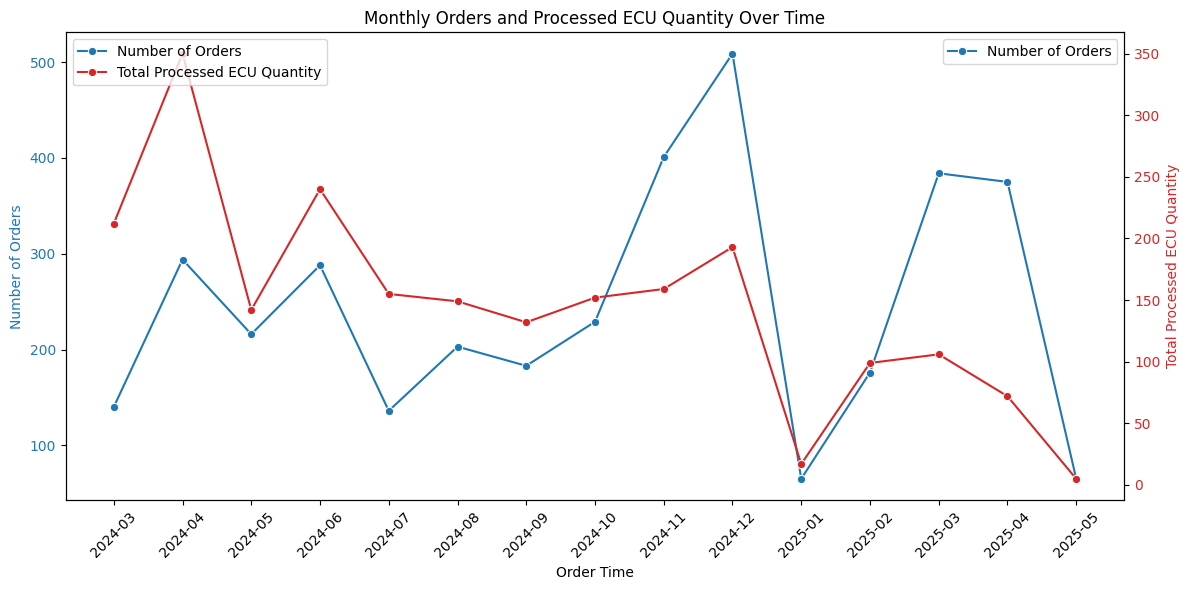

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot monthly orders on the primary y-axis
sns.lineplot(data=monthly_comparison, x='订单时间', y='订单数', ax=ax1, marker='o', color='tab:blue', label='Number of Orders')
ax1.set_xlabel('Order Time')
ax1.set_ylabel('Number of Orders', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Monthly Orders and Processed ECU Quantity Over Time')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(monthly_comparison['订单时间'])))
ax1.set_xticklabels(monthly_comparison['订单时间'], rotation=45)

# Create a secondary y-axis for total processed ECU quantity
ax2 = ax1.twinx()
sns.lineplot(data=monthly_comparison, x='订单时间', y='总处理ECU数量', ax=ax2, marker='o', color='tab:red', label='Total Processed ECU Quantity')
ax2.set_ylabel('Total Processed ECU Quantity', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.show()

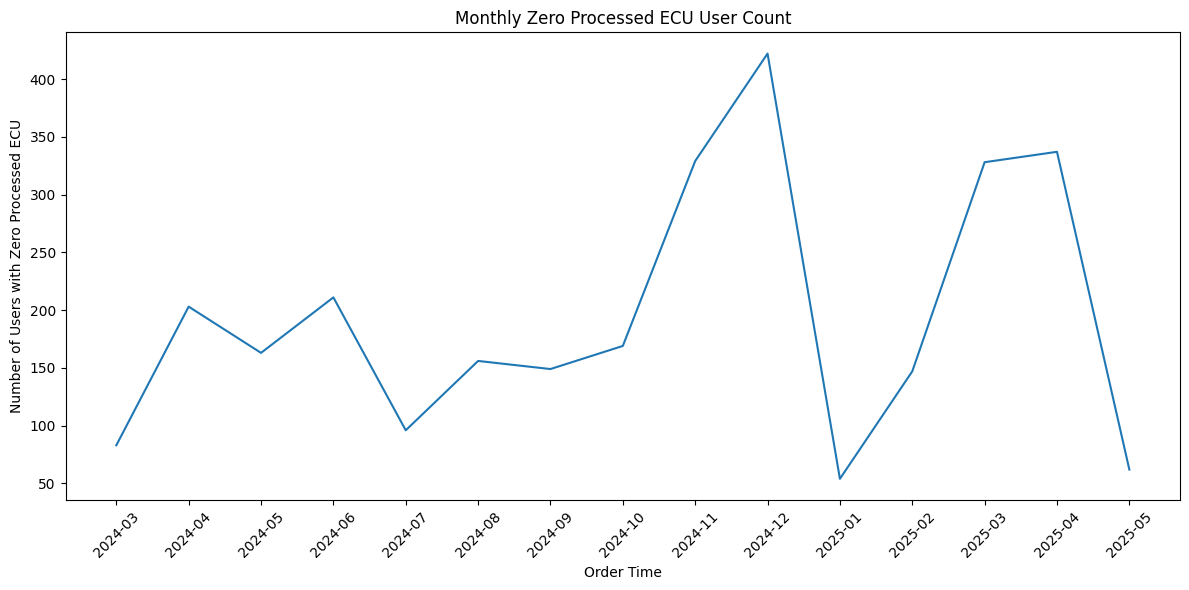

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_zero_ecu_users['订单时间'] = monthly_zero_ecu_users['订单时间'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_zero_ecu_users, x='订单时间', y='零处理ECU用户数')
plt.title('Monthly Zero Processed ECU User Count')
plt.xlabel('Order Time')
plt.ylabel('Number of Users with Zero Processed ECU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Ensure '订单时间' is in the same format for merging
monthly_zero_ecu_users['订单时间'] = monthly_zero_ecu_users['订单时间'].astype(str)
monthly_orders['订单时间'] = monthly_orders['订单时间'].astype(str)


# Merge monthly zero ECU users with monthly total orders
monthly_zero_ecu_percentage = pd.merge(monthly_zero_ecu_users, monthly_orders, on='订单时间')

# Calculate the percentage of zero ECU users
monthly_zero_ecu_percentage['零处理ECU用户占比'] = (monthly_zero_ecu_percentage['零处理ECU用户数'] / monthly_zero_ecu_percentage['订单数']) * 100

print("每月零处理ECU用户占比：")
display(monthly_zero_ecu_percentage)

每月零处理ECU用户占比：


,订单时间,零处理ECU用户数,订单数,零处理ECU用户占比
0,2024-03,83,140,59.285714
1,2024-04,203,294,69.047619
2,2024-05,163,216,75.462963
3,2024-06,211,288,73.263889
4,2024-07,96,136,70.588235
5,2024-08,156,203,76.847291
6,2024-09,149,183,81.420765
7,2024-10,169,229,73.799127
8,2024-11,329,401,82.044888
9,2024-12,422,509,82.907662


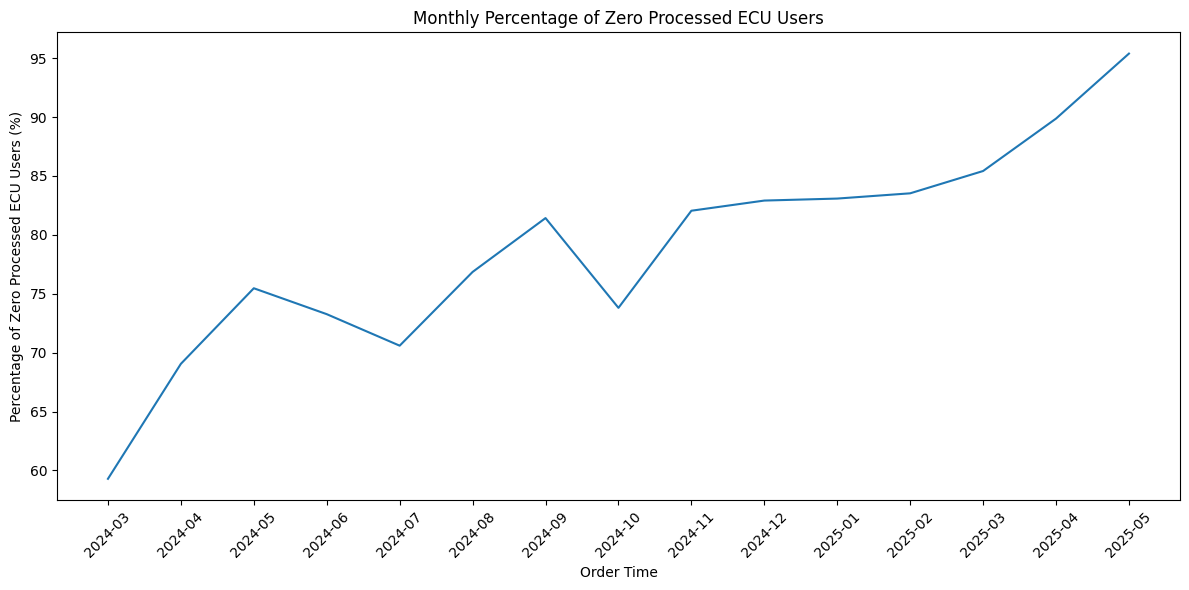

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_zero_ecu_percentage['订单时间'] = monthly_zero_ecu_percentage['订单时间'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_zero_ecu_percentage, x='订单时间', y='零处理ECU用户占比')
plt.title('Monthly Percentage of Zero Processed ECU Users')
plt.xlabel('Order Time')
plt.ylabel('Percentage of Zero Processed ECU Users (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task
Analyze the data in "/content/MAX用户加密ECU处理分析.xlsx". Extract the order date from the '订单号' column and create a new column for it. Analyze the distribution of users based on the number of ECUs processed, grouping users into categories: 0, 1-2, 3-5, and 5+. Analyze and visualize the trend of these user group distributions over time.

## 计算每个用户的总处理 ecu 数量

### Subtask:
统计每个用户的总处理 ECU 数量。找出处理 ECU 数量最多的用户并进行排名。


**Reasoning**:
Group the DataFrame by '用户 ID', calculate the sum of '处理 ECU 数量' for each user, sort the results in descending order, and display the top users.



In [27]:
user_ecu_summary = df.groupby('用户ID')['处理ECU数量'].sum().reset_index(name='总处理ECU数量')
user_ecu_summary = user_ecu_summary.sort_values(by='总处理ECU数量', ascending=False)
display(user_ecu_summary.head())

,用户ID,总处理ECU数量
249,13718,45
2234,352332,39
159,8633,27
1412,136150,24
3209,671453,20


## 根据总处理 ecu 数量对用户进行分组

### Subtask:
根据总处理 ECU 数量将用户分组。


**Reasoning**:
Create a new column 'ECU分组' in the `user_ecu_summary` DataFrame based on the '总处理ECU数量' column, categorizing users into groups: 0, 1-2, 3-5, and 5+. Then, display the first few rows of the updated DataFrame to verify the new column.



In [28]:
bins = [-float('inf'), 0, 2, 5, float('inf')]
labels = ['0', '1-2', '3-5', '5+']
user_ecu_summary['ECU分组'] = pd.cut(user_ecu_summary['总处理ECU数量'], bins=bins, labels=labels, right=True, include_lowest=True)

# Handle the case where '总处理ECU数量' is 0 explicitly to ensure it falls into the '0' category
user_ecu_summary['ECU分组'] = user_ecu_summary['ECU分组'].cat.add_categories('0').fillna('0')
user_ecu_summary.loc[user_ecu_summary['总处理ECU数量'] == 0, 'ECU分组'] = '0'


display(user_ecu_summary.head())

ValueError: new categories must not include old categories: {'0'}

**Reasoning**:
The previous attempt to add category '0' failed because it already exists. The bins and labels should correctly handle the '0' category from the start. I will correct the bin boundaries and labels to include 0 and then apply the categorization.



In [29]:
bins = [-0.1, 0, 2, 5, float('inf')] # Adjusted bins to include 0 specifically
labels = ['0', '1-2', '3-5', '5+']
user_ecu_summary['ECU分组'] = pd.cut(user_ecu_summary['总处理ECU数量'], bins=bins, labels=labels, right=True)

display(user_ecu_summary.head())

,用户ID,总处理ECU数量,ECU分组
249,13718,45,5+
2234,352332,39,5+
159,8633,27,5+
1412,136150,24,5+
3209,671453,20,5+


## 分析分组用户分布的时间趋势

### Subtask:
按时间（月）和用户分组对数据进行分组，统计每个月各分组的用户数量。


**Reasoning**:
Create a new column for the order month, merge the dataframes to include user groups, group by month and user group, count the number of unique users, and rename the count column.



In [30]:
df['订单月份'] = df['订单时间'].dt.to_period('M')

df_merged = pd.merge(df, user_ecu_summary[['用户ID', 'ECU分组']], on='用户ID', how='left')

monthly_user_group_distribution = df_merged.groupby(['订单月份', 'ECU分组'])['用户ID'].nunique().reset_index(name='用户数')

display(monthly_user_group_distribution.head())

<ipython-input-30-bc2c13428cd5>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_user_group_distribution = df_merged.groupby(['订单月份', 'ECU分组'])['用户ID'].nunique().reset_index(name='用户数')


,订单月份,ECU分组,用户数
0,2024-03,0,83
1,2024-03,1-2,28
2,2024-03,3-5,15
3,2024-03,5+,14
4,2024-04,0,202


## 可视化分组用户分布的时间趋势

### Subtask:
使用适当的图表（例如，堆积面积图或分组柱状图）可视化每个月各用户分组的数量或比例随时间的变化。


**Reasoning**:
Visualize the monthly user group distribution using a grouped bar chart to compare the number of users in each ECU group over time.



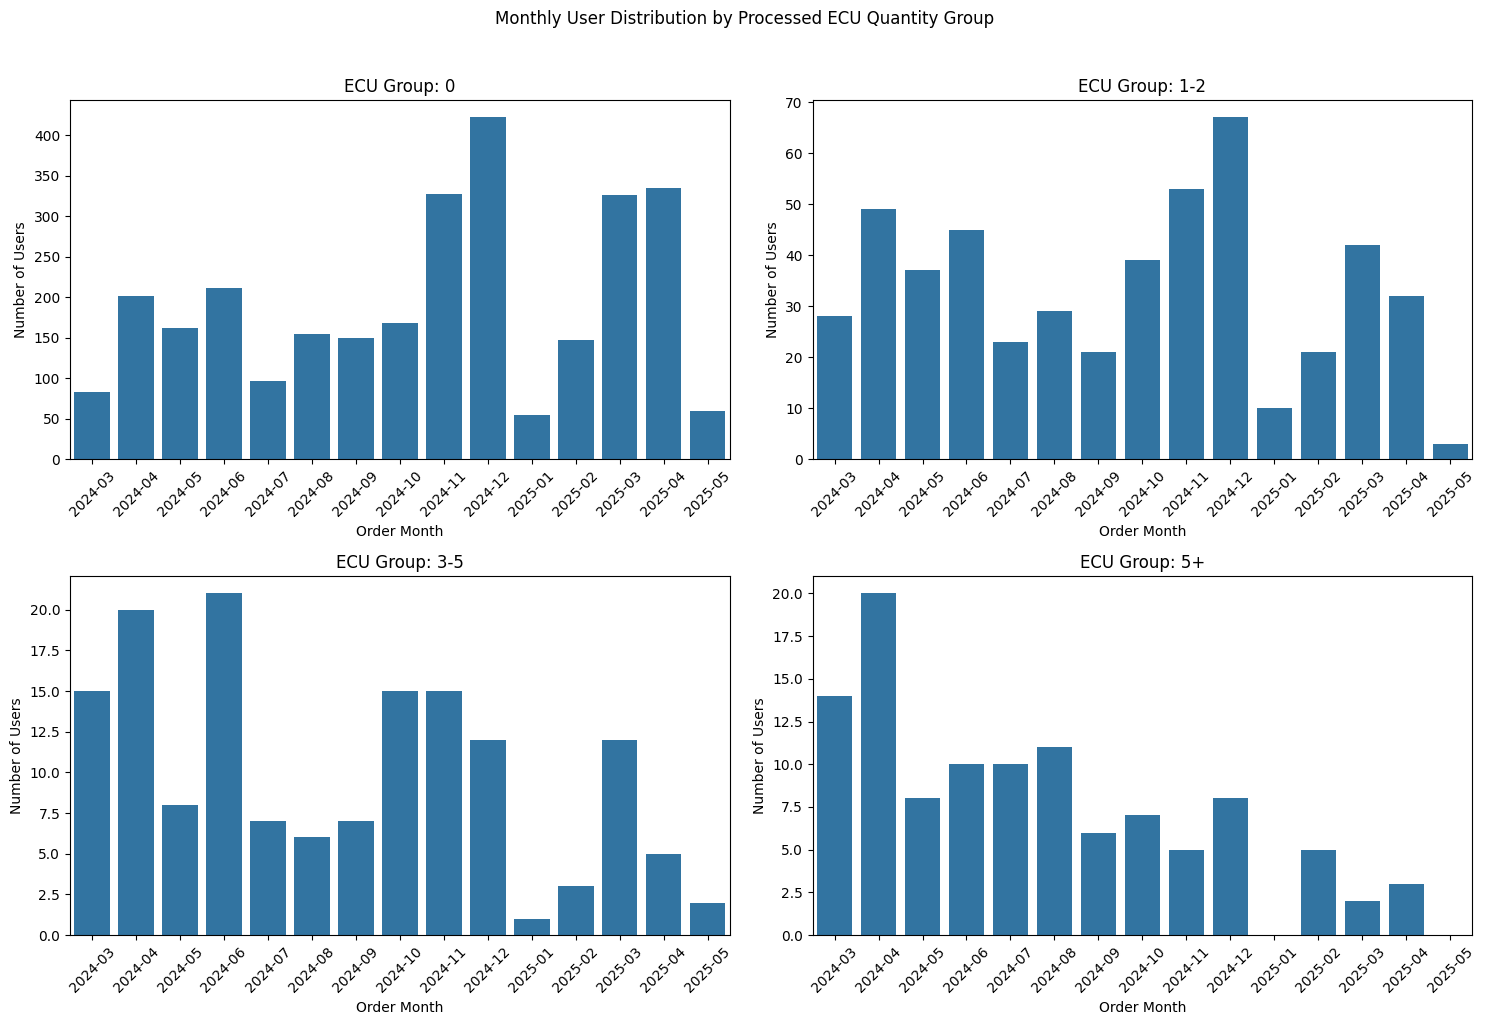

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set a font that supports Chinese characters to avoid warnings
mpl.rcParams['font.sans-serif'] = ['SimHei']  # Or another font like 'Microsoft YaHei'
mpl.rcParams['axes.unicode_minus'] = False # Correctly display minus signs


monthly_user_group_distribution['订单月份'] = monthly_user_group_distribution['订单月份'].astype(str)

# Translate Chinese labels to English
english_labels = {'0': '0', '1-2': '1-2', '3-5': '3-5', '5+': '5+'}
monthly_user_group_distribution['ECU Group (English)'] = monthly_user_group_distribution['ECU分组'].map(english_labels)


# Get unique ECU groups to create subplots
ecu_groups = monthly_user_group_distribution['ECU Group (English)'].unique()
n_groups = len(ecu_groups)

# Create subplots with separate y-axes
fig, axes = plt.subplots(nrows=(n_groups + 1) // 2, ncols=2, figsize=(15, (n_groups + 1) // 2 * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

fig.suptitle('Monthly User Distribution by Processed ECU Quantity Group', y=1.02)

for i, group in enumerate(ecu_groups):
    sns.barplot(data=monthly_user_group_distribution[monthly_user_group_distribution['ECU Group (English)'] == group],
                x='订单月份', y='用户数', ax=axes[i])
    axes[i].set_title(f'ECU Group: {group}')
    axes[i].set_xlabel('Order Month')
    axes[i].set_ylabel('Number of Users')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y')


# Hide any unused subplots
if n_groups < len(axes):
    for j in range(n_groups, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The total processed ECU quantity was calculated for each user, and users were ranked based on this quantity.
*   Users were successfully categorized into groups based on their total processed ECU quantity: '0', '1-2', '3-5', and '5+'.
*   The distribution of users within these ECU groups was analyzed and counted on a monthly basis.
*   A grouped bar chart was generated to visualize the monthly user distribution across the different ECU processing groups, showing the number of users in each group for each month.

### Insights or Next Steps

*   Analyze the trends observed in the monthly user distribution charts for each ECU group to understand the growth or decline of different user segments over time.
*   Investigate potential factors influencing the observed trends, such as marketing campaigns, product updates, or seasonal variations.


## Summary:

### Data Analysis Key Findings

* The total processed ECU quantity was calculated for each user, and users were ranked based on this quantity.
* Users were successfully categorized into groups based on their total processed ECU quantity: '0', '1-2', '3-5', and '5+'.
* The distribution of users within these ECU groups was analyzed and counted on a monthly basis.
* A grouped bar chart was generated to visualize the monthly user distribution across the different ECU processing groups, showing the number of users in each group for each month.

### Insights or Next Steps

* Analyze the trends observed in the monthly user distribution charts for each ECU group to understand the growth or decline of different user segments over time.
* Investigate potential factors influencing the observed trends, such as marketing campaigns, product updates, or seasonal variations.

## Summary:

### Data Analysis Key Findings

* The total processed ECU quantity was calculated for each user, and users were ranked based on this quantity.
* Users were successfully categorized into groups based on their total processed ECU quantity: '0', '1-2', '3-5', and '5+'.
* The distribution of users within these ECU groups was analyzed and counted on a monthly basis.
* A grouped bar chart was generated to visualize the monthly user distribution across the different ECU processing groups, showing the number of users in each group for each month.

### Insights or Next Steps

* Analyze the trends observed in the monthly user distribution charts for each ECU group to understand the growth or decline of different user segments over time.
* Investigate potential factors influencing the observed trends, such as marketing campaigns, product updates, or seasonal variations.